# Occupation Variable in 2008-2012 PUMs
In mdat you can see that 2008-2012 has no OCCP variable. It has `OCCP02`, `OCCP10`, and `OCCP12`. Each of these has a description like 

"Occupation recode for data collected in \<some year> based on \<some other year > OCC codes"

This notebook is to explore how these columns look and see if there is pattern that helps us figure out what's going on. The PUMA00 and PUMA10 columns were mutually exclusive which made it easy to just take the column that is populated. Hopefully this is as easy

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import numpy as np

In [75]:
import sys
sys.path.append('../utils')
import wd_management
wd_management.set_wd_root()

called set_wd_root. current working directory is /Users/alexanderweinstein/Documents/Data_Products/db-equitable-development-tool


In [76]:
from ingest.PUMS.PUMS_query_manager import get_urls
from ingest.PUMS.PUMS_request import make_GET_request

Copy and paste URL to work with from result of `get_urls`

In [77]:
urls = get_urls(variable_types=['economics'],limited_PUMA=True, year=2012)
urls

variables are [('HINCP', 'clean_continous'), ('ESR', 'clean_simple_cateogorical'), ('WAGP', 'clean_continous'), ('SCHL', 'clean_simple_cateogorical'), ('INDP', 'clean_range_categorical'), ('OCCP', 'clean_range_categorical')]


{'vi': ['https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,OCCP&ucgid=0400000US36&PUMA00=4001,3701',
  'https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,OCCP&ucgid=0400000US36&PUMA10=4001,3701',
  'https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,OCCP&ucgid=0400000US36&PUMA00=4101,3901,3801',
  'https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,OCCP&ucgid=0400000US36&PUMA10=4101,3901,3801'],
 'rw_one': ['https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40&ucgid=0400000US

Check that all variables other than `OCCP` work

In [78]:
url = 'https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP&ucgid=0400000US36&PUMA00=4001,3701'

In [79]:
data = make_GET_request(url, 'test_2012')
data

,SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,PUMA00,ST
0,2008000001973,1,21,11530,1,0,19,8470,3701,36
1,2008000001973,2,21,11530,6,530,14,4980,3701,36
2,2008000001973,3,22,11530,0,-1,11,169,3701,36
3,2008000001973,4,23,11530,0,-1,8,169,3701,36
4,2008000001973,5,42,11530,6,0,6,169,3701,36
...,...,...,...,...,...,...,...,...,...,...
8535,2011001492077,3,16,12560,6,1200,19,4380,4001,36
8536,2011001493274,1,19,76000,1,70000,21,6480,4001,36
8537,2011001494738,1,16,29000,1,29000,20,7970,4001,36
8538,2011001497011,1,57,3800,6,0,13,169,4001,36


Looks good. Next add the `OCCP02`, `OCCP10`, `OCCP12` 

In [80]:
url = 'https://api.census.gov/data/2012/acs/acs5/pums?get=SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12&ucgid=0400000US36&PUMA00=4001,3701'

In [81]:
data = make_GET_request(url, 'test_2012')
data

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST
0,2008000000308,1,40,49,46100,1,0,16,8470,4600,N.A.,N.A.,3701,36
1,2008000000308,2,41,57,46100,1,8400,21,6180,7210,N.A.,N.A.,3701,36
2,2008000000308,3,62,26,46100,1,16800,16,3960,8760,N.A.,N.A.,3701,36
3,2008000000308,4,43,24,46100,2,0,20,9290,4600,N.A.,N.A.,3701,36
4,2008000000308,5,40,2,46100,0,-1,0,169,-1,-1,-1,3701,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,2011001494106,2,7,30,10000,6,0,16,169,-1,-1,-1,4001,36
8536,2011001494106,3,6,7,10000,0,-1,4,169,-1,-1,-1,4001,36
8537,2011001494106,4,6,6,10000,0,-1,3,169,-1,-1,-1,4001,36
8538,2011001494106,5,7,4,10000,0,-1,2,169,-1,-1,-1,4001,36


Cl

Clean by sending -1 and "N.A." to zero

In [82]:
OCCP_cols = ['OCCP02','OCCP10','OCCP12']
data[OCCP_cols] = data[OCCP_cols].replace({"-1":None, 'N.A.':None})
data

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST
0,2008000000308,1,40,49,46100,1,0,16,8470,4600,None,None,3701,36
1,2008000000308,2,41,57,46100,1,8400,21,6180,7210,None,None,3701,36
2,2008000000308,3,62,26,46100,1,16800,16,3960,8760,None,None,3701,36
3,2008000000308,4,43,24,46100,2,0,20,9290,4600,None,None,3701,36
4,2008000000308,5,40,2,46100,0,-1,0,169,None,None,None,3701,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,2011001494106,2,7,30,10000,6,0,16,169,None,None,None,4001,36
8536,2011001494106,3,6,7,10000,0,-1,4,169,None,None,None,4001,36
8537,2011001494106,4,6,6,10000,0,-1,3,169,None,None,None,4001,36
8538,2011001494106,5,7,4,10000,0,-1,2,169,None,None,None,4001,36


Are there records that have more than one of the occupation columns populated?

In [83]:
data[data['OCCP02'].notnull() & data['OCCP10'].notnull()]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST


In [84]:
data[data['OCCP02'].notnull() & data['OCCP12'].notnull()]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST


In [85]:
data[data['OCCP10'].notnull() & data['OCCP12'].notnull()]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST


No, they are mutually exclusive. Look at ages of those with no occupation: if they are mostly young that's evidence that our OCCP columns capture occupation 

<AxesSubplot:ylabel='Frequency'>

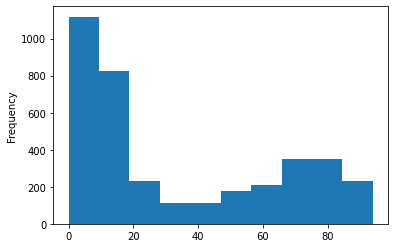

In [86]:
data[data['OCCP02'].isna() & data['OCCP10'].isna() & data['OCCP12'].isna()]['AGEP'].replace(np.inf, np.nan).astype(int).plot.hist()

Ok that clusters at young and old, would make sense for unemployed.

Next look at wages: are wages -1 or 0 for those with no occupation?

In [87]:
data[data['OCCP02'].isna() & data['OCCP10'].isna() & data['OCCP12'].isna() &data['WAGP']>1]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST


Ok that seems good, feel confident that all occupation is captured across those three columns. Next develop code to collapse to one column

In [88]:
def get_occupation(record):
    occp_cols = ['OCCP02','OCCP10','OCCP12']
    for c in occp_cols:
        if record[c] is not None:
            return record[c]
    return None

In [89]:
data['OCCP'] = data.apply(get_occupation, axis=1)

In [90]:
data

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST,OCCP
0,2008000000308,1,40,49,46100,1,0,16,8470,4600,None,None,3701,36,4600
1,2008000000308,2,41,57,46100,1,8400,21,6180,7210,None,None,3701,36,7210
2,2008000000308,3,62,26,46100,1,16800,16,3960,8760,None,None,3701,36,8760
3,2008000000308,4,43,24,46100,2,0,20,9290,4600,None,None,3701,36,4600
4,2008000000308,5,40,2,46100,0,-1,0,169,None,None,None,3701,36,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,2011001494106,2,7,30,10000,6,0,16,169,None,None,None,4001,36,None
8536,2011001494106,3,6,7,10000,0,-1,4,169,None,None,None,4001,36,None
8537,2011001494106,4,6,6,10000,0,-1,3,169,None,None,None,4001,36,None
8538,2011001494106,5,7,4,10000,0,-1,2,169,None,None,None,4001,36,None


In [93]:
data[data['OCCP10'].notnull()]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST,OCCP
1384,2010000016213,1,54,51,33000,3,26000,22,8470,None,2300,None,3701,36,2300
1385,2010000024418,1,18,29,45000,1,45000,19,6970,None,5120,None,3701,36,5120
1386,2010000033729,1,13,39,125000,3,120000,21,8560,None,2700,None,4001,36,2700
1387,2010000036037,1,41,52,200000,2,100000,23,9470,None,3850,None,3701,36,3850
1388,2010000036037,2,40,53,200000,1,100000,22,8190,None,3050,None,3701,36,3050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,2011001455774,1,13,33,44000,1,14000,16,8680,None,4020,None,4001,36,4020
8527,2011001455774,2,23,63,44000,1,30000,1,8170,None,3600,None,4001,36,3600
8530,2011001472091,1,6,38,25000,1,10000,21,7280,None,5120,None,4001,36,5120
8531,2011001472091,2,8,35,25000,1,15000,17,6690,None,1030,None,4001,36,1030


In [94]:
data[data['OCCP12'].notnull()]

,SERIALNO,SPORDER,PWGTP,AGEP,HINCP,ESR,WAGP,SCHL,INDP,OCCP02,OCCP10,OCCP12,PUMA00,ST,OCCP


Lol ok there actually are no OCCP12 in the dataset

In [91]:
data['OCCP'].notnull().sum()

4827

In [92]:
data[data['OCCP02'].notnull() | data['OCCP10'].notnull() | data['OCCP12'].notnull()].shape[0]

4827

This looks good, going to implement this logic in the PUMS ingestion process

How does the OCCP in 2015-2019 represent not working?

In [98]:
urls = get_urls(variable_types=['economics'],limited_PUMA=True, year=2019)
url = urls['vi'][0]

In [99]:
data_2019 = make_GET_request(url, 'test_2012')

In [101]:
data_2019

,SERIALNO,SPORDER,PWGTP,HINCP,ESR,WAGP,SCHL,INDP,OCCP,PUMA,ST
0,2015000014486,1,15,29200,1,29200,21,7780,5240,4001,36
1,2015000022540,1,15,65000,1,65000,22,7860,2310,4001,36
2,2015000026766,1,8,80300,6,0,16,169,9,4001,36
3,2015000026766,2,8,80300,6,0,19,169,9,4001,36
4,2015000026832,1,24,150000,1,0,21,8563,4900,4001,36
...,...,...,...,...,...,...,...,...,...,...,...
11791,2019HU1399286,1,28,100650,1,100000,22,6480,2830,3701,36
11792,2019HU1399286,2,23,100650,6,0,22,7590,2850,3701,36
11793,2019HU1399286,3,29,100650,0,-1,11,169,9,3701,36
11794,2019HU1401916,1,10,92800,1,100000,22,6570,2600,4001,36


Seems like 9